#### DSC530-302 Data Exploration and Analysis
##### Author: Chitramoy Mukherjee
##### Date: 05/29/2023
##### Title: "DSC530-302 Week-12 Final Project on Music and Mental health EDA analysis"

In [295]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd

#Required python visualization libraries

# import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#matplotlib inli

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

import thinkstats2
import thinkplot

df = pd.read_csv("C:\\Users\\14024\\Desktop\\MS-DSC\\DSC-530\\Final-Project\\mxmh_survey_results.csv")

# Check first 5 rows of the dataset 
df.head()


999999999.0


In [135]:
# Check lat 5 rows of the dataset 
df.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55:20,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


In [136]:
# Check column name and datatype and constraints 
# Identify the columns (variables) from the dataset will be used for analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

#### Identify the variables will be used during analysis and describe them
    
        1.   Age                          : Respondent's age
        2.   Primary streaming service    : Respondent's primary streaming service.
        3.   Hours per day                : Number of hours the respondent listens to music per day.
        4.   Anxiety                      : Anxiety level between 1 to 10.
        5.   Depression                   : Depression level between 1 to 10.
        6.   Insomnia                     : Insomnia level between 1 to 10.
        7.   BPM                          : BPM is the abbreviation of beats per minute, a musical term 
                                            that means measuring the tempo of the music.
        8.   While working                : Does the respondent listen to music while studying/working?
        9.   Instrumentalist              : Does the respondent play an instrument regularly?
       10.   Composer                     : Does the respondent compose music?
       11.   Fav genre                    : Respondent's favorite or top genre?
       12.   Exploratory                  : Does the respondent actively explore new artists/genres?
       13.   Foreign languages            : Listen to Foreign language music?
        

In [139]:
# Check Age wise record count in the dataset

print(df['Age'].value_counts())
print("\n \n")

# Display unique Streaming services from the dataset
print(df['Primary streaming service'].unique())



18.0    85
19.0    61
17.0    59
21.0    52
16.0    44
        ..
39.0     1
73.0     1
72.0     1
69.0     1
89.0     1
Name: Age, Length: 61, dtype: int64

 

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]


#### Include a histogram of each of the 5 variables and identify any outliers

'Age'
Minimum value:  10.0
Maximum value:  89.0
How many values are NaN?:  1
'Age'
Minimum value:  10.0
Maximum value:  89.0
How many values are NaN?:  1
Frequency table for age_clean:
999999999.0


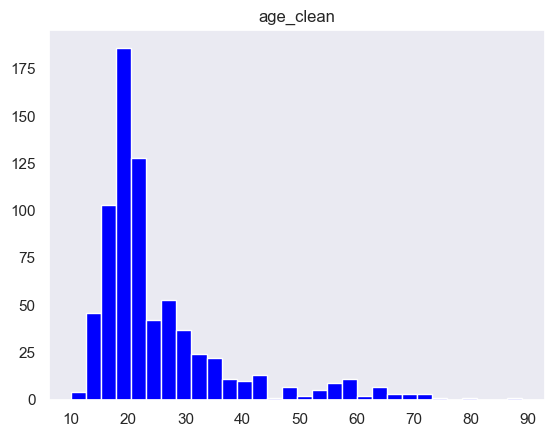

In [296]:
# Explore the numeric variable Age to confirm whether all values are within a reasonable range and if any are NaN.
print("'Age'")
print("Minimum value: ", df["Age"].min())
print("Maximum value: ", df["Age"].max())
print("How many values are NaN?: ", pd.isnull(df['Age']).sum())

# Create a new column "age_clean" that replaces out-of-range ages with "NaN"

def clean_age(Age):
    if Age>=0 and Age<=90:
        return Age
    else:
        return np.nan
df['age_clean'] = df['Age'].apply(clean_age)

# Check out the new column and make sure it looks right

print("'Age'")
print("Minimum value: ", df["age_clean"].min())
print("Maximum value: ", df["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(df['age_clean']).sum())
print("Frequency table for age_clean:")
df["age_clean"].value_counts().sort_index(0)

# Plot a histogram of the respondents' ages (remove any NaN values)

df.hist(['age_clean'], bins=30, color='blue', grid=False)


In [152]:
print("Ages for which record count is more than 50 in dataset:")

df['age_clean'].value_counts().loc[lambda x : x>50]

Ages for which record count is more than 50 in dataset:


18.0    85
19.0    61
17.0    59
21.0    52
Name: age_clean, dtype: int64

In [153]:
df['age_clean'].max()

# Most respondents are in their late teens or early twenties. A single 89 year old respondent, can we consider it as outlier!

89.0

Max Hours per day: 15.0
Min Hours per day: 0.1
999999999.0


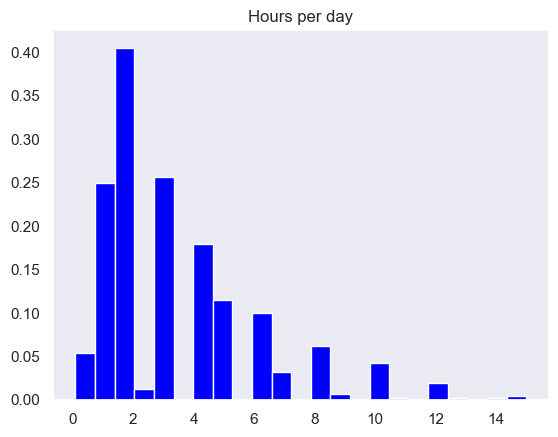

In [297]:
# majority of respondents listen to music between 0-5 hours per day. Total 24 respondents that claim to listen 
# to music more than 12Hrs a day. 3 respondents claims they listen music 24hrs a day which can be considered as a outlier.
# Data also contains 0 in hours per day, which will consider outliers for this analysis.

df = df[(df['Hours per day'] <= 15) & (df['Hours per day'] > 0)]
print('Max Hours per day:' , df['Hours per day'].max()) 
print('Min Hours per day:' , df['Hours per day'].min()) 

# Evaluate variable 'Hours per day' from the dataset and plot histogram and identify outliers

df.hist(['Hours per day'], bins='auto', density=True, color = 'blue', grid=False)

df['Hours per day'].value_counts().loc[lambda x : x>1]


array([[<AxesSubplot:title={'center':'Anxiety'}>]], dtype=object)

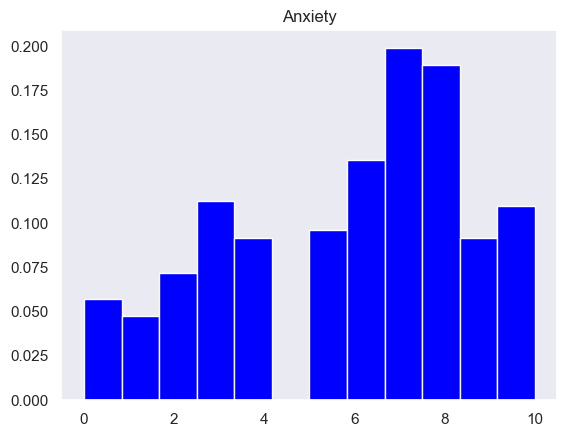

In [278]:
# Histogram plot based on Anxiety

df.hist(['Anxiety'], bins='auto', density=True, color = 'blue', grid=False)

# All respondent provided input for Anxiety based on the scale of 1 to 10. So don't find any outlier.

array([[<AxesSubplot:title={'center':'Depression'}>]], dtype=object)

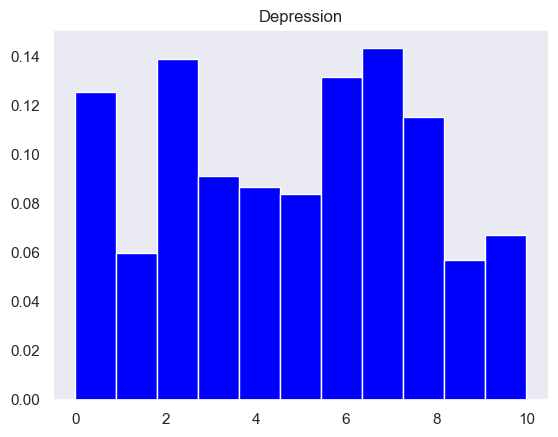

In [276]:
# Histogram plot based on Depression

df.hist(['Depression'], bins='auto', density=True, color = 'blue', grid=False)

# All respondent provided input for Depression based on the scale of 1 to 10. So don't find any outlier.

array([[<AxesSubplot:title={'center':'Insomnia'}>]], dtype=object)

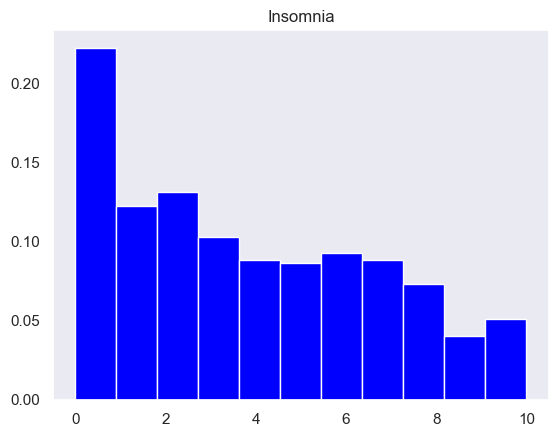

In [277]:
# Histogram plot based on Insomnia

df.hist(['Insomnia'], bins='auto', density=True, color = 'blue', grid=False)

# All respondent provided input for Insomnia based on the scale of 1 to 10. So don't find any outlier.

999999999.0
0.0
220.0
40.0


array([[<AxesSubplot:title={'center':'BPM'}>]], dtype=object)

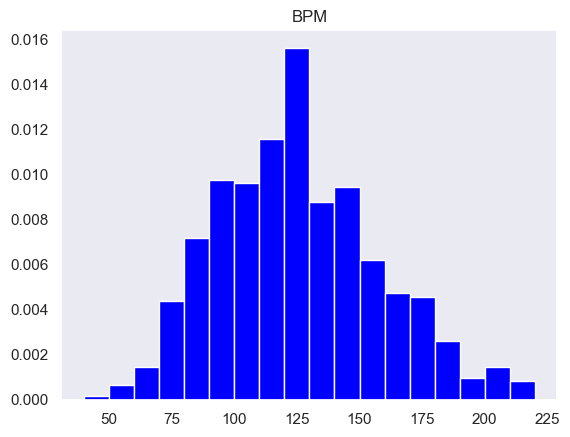

In [298]:
# Remove outliers from BPM and plot histogram

print(df['BPM'].max())
print(df['BPM'].min())

# filter out outliers by creating upper and lower bounds

df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

# Histogram plot based on BPM

df.hist(['BPM'], bins='auto', density=True, color = 'blue', grid=False)

#### Include the other descriptive characteristics about the variables

In [176]:
# Calculate the mean, modes, variance and standard deviation of different numeric variables

print('Calculated Age mean:' , df.age_clean.mean()) 
print('Calculated Age mode:' , df.age_clean.mode())
print('Calculated Age var:' , df.age_clean.var())
print('Calculated Age std:' , df.age_clean.std())

print('Calculated Hours per day mean:' , df['Hours per day'].mean()) 
print('Calculated Hours per day mode:' , df['Hours per day'].mean()) 
print('Calculated Hours per day var:' , df['Hours per day'].mean()) 
print('Calculated Hours per day std:' , df['Hours per day'].mean()) 

print('Calculated Anxiety mean:' , df.Anxiety.mean()) 
print('Calculated Anxiety mode:' , df.Anxiety.mode())
print('Calculated Anxiety var:' , df.Anxiety.var())
print('Calculated Anxiety std:' , df.Anxiety.std())

print('Calculated Depression mean:' , df.Depression.mean()) 
print('Calculated Depression mode:' , df.Depression.mode())
print('Calculated Depression var:' , df.Depression.var())
print('Calculated Depression std:' , df.Depression.std())

print('Calculated Insomnia mean:' , df.Anxiety.mean()) 
print('Calculated Insomnia mode:' , df.Anxiety.mode())
print('Calculated Insomnia var:' , df.Anxiety.var())
print('Calculated Insomnia std:' , df.Anxiety.std())

Calculated Age mean: 25.206802721088437
Calculated Age mode: 0    18.0
Name: age_clean, dtype: float64
Calculated Age var: 145.32229698418882
Calculated Age std: 12.05496980436653
Calculated Hours per day mean: 3.5727581521739125
Calculated Hours per day mode: 3.5727581521739125
Calculated Hours per day var: 3.5727581521739125
Calculated Hours per day std: 3.5727581521739125
Calculated Anxiety mean: 5.837635869565218
Calculated Anxiety mode: 0    7.0
Name: Anxiety, dtype: float64
Calculated Anxiety var: 7.801153042738856
Calculated Anxiety std: 2.7930544288894295
Calculated Depression mean: 4.796195652173913
Calculated Depression mode: 0    7.0
Name: Depression, dtype: float64
Calculated Depression var: 9.174053534457263
Calculated Depression std: 3.028870009501442
Calculated Insomnia mean: 5.837635869565218
Calculated Insomnia mode: 0    7.0
Name: Anxiety, dtype: float64
Calculated Insomnia var: 7.801153042738856
Calculated Insomnia std: 2.7930544288894295


In [272]:
# Spotify is the most popular music streaming service, accounting for 62% of all respondents. Spotify, along with 
# Apple Music, also has a marginally younger userbase than other streaming platforms. Pandora has the oldest user base 
# by far, with the median user age at ~60 years old.

s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music                          20.0
 I do not use a streaming service.    24.0
 Other streaming service              25.0
 Pandora                              60.0
 Spotify                              20.0
 YouTube Music                        22.0
 Name: Age, dtype: float64]

<AxesSubplot:ylabel='Composer'>

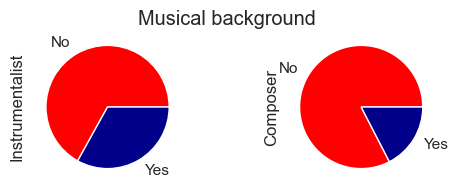

In [317]:
# Does most of the music listener likes to play instrument or music composer who listens music.
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["red", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["red", "darkblue"], labeldistance = 1.2)

#### Compare two scenarios in your data using a PMF

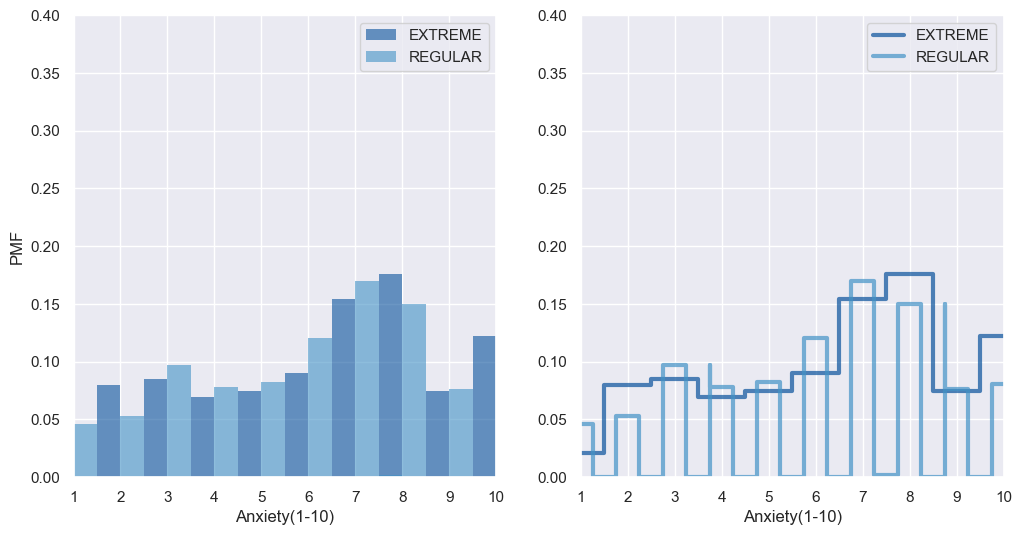

In [230]:
# plotting of Anxiety based on hours per day music listening. difference in probability of Anxiety (in percentage points) 
# between Hours per day >= 5 and less than 5.

import thinkstats2
import thinkplot

extr_hpd = df[df['Hours per day'] >= 5]
extr_anx = extr_hpd.Anxiety
rglr_hpd = df[df['Hours per day'] < 5]

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n
    
first_pmf = thinkstats2.Pmf(extr_hpd.Anxiety, label="EXTREME")
other_pmf = thinkstats2.Pmf(rglr_hpd.Anxiety, label="REGULAR")

width = 0.5
axis = [1, 10, 0, .4]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Anxiety(1-10)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Anxiety(1-10)", axis=axis)


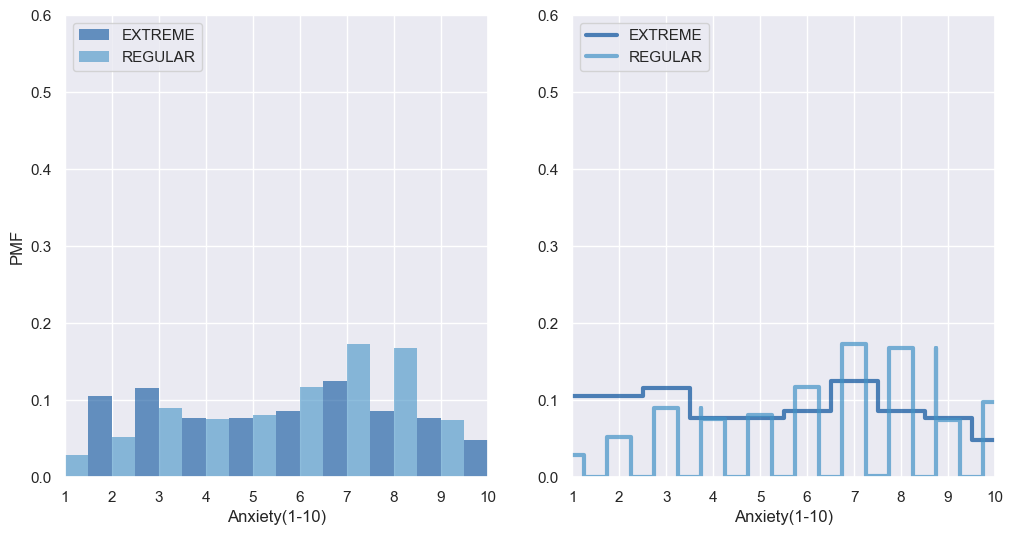

In [247]:
# ploting of Anxiety based on Age. difference in probability of Anxiety (in percentage points) 
# between Age greater than 35 and less than 35.

import thinkstats2
import thinkplot

grown_age = df[df.Age >= 35]
extr_anx = grown_age.Anxiety
rglr_age = df[df.Age < 35]

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

first_pmf = thinkstats2.Pmf(grown_age.Anxiety, label="EXTREME")
other_pmf = thinkstats2.Pmf(rglr_age.Anxiety, label="REGULAR")

width = 0.5
axis = [1, 10, 0, .6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Anxiety(1-10)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Anxiety(1-10)", axis=axis)

#### Create 1 CDF with one of your variables

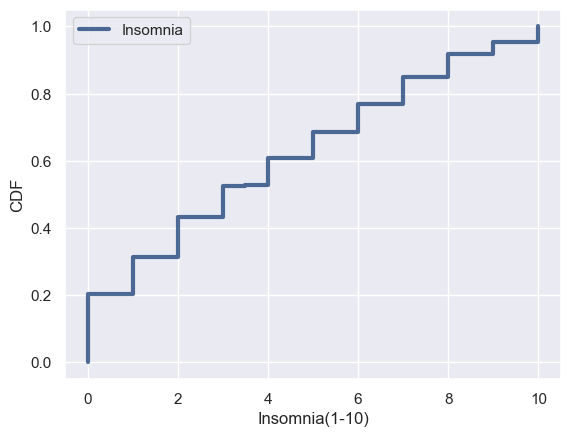

In [246]:
# ploting CDF against the Insomnia (1-10) rating provided by the respondent in the survey.

cdf = thinkstats2.Cdf(df.Insomnia, label='Insomnia')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Insomnia(1-10)', ylabel='CDF', loc='upper left')


In [241]:
# cdf provides probability, it computes the fraction of values less than or equal to the given value. For example, 85% of 
# respondent have entered Insomnia 7 or less. 

cdf.Prob(7)

0.8505434782608695

In [243]:
# Value evaluates the inverse CDF, given a fraction, it computes the corresponding value.iven a fraction, it computes the corresponding value  

cdf.Value(0.5)

3.0

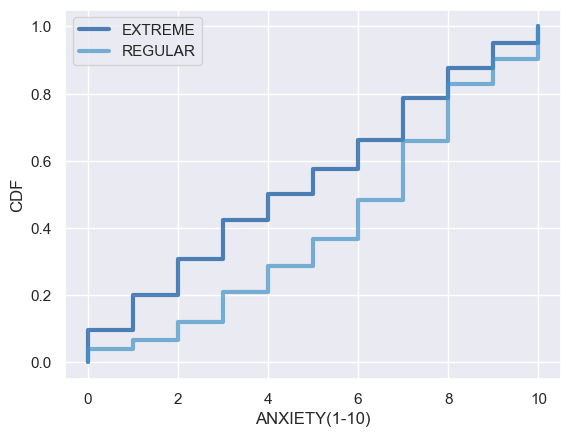

In [249]:
# CDF vs EXTREME and REGULAR ANXIETY ploting.

first_cdf = thinkstats2.Cdf(extr_hpd.Anxiety, label='EXTREME')
other_cdf = thinkstats2.Cdf(rglr_hpd.Anxiety, label='REGULAR')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='ANXIETY(1-10)', ylabel='CDF')

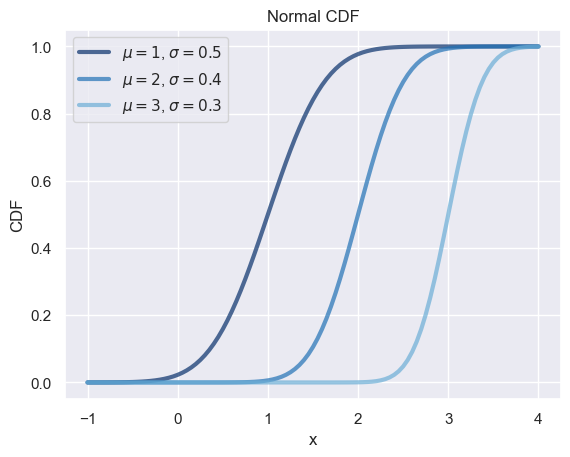

In [250]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

#### Create two scatter plots comparing two variables and provide your analysis on correlation and causation.

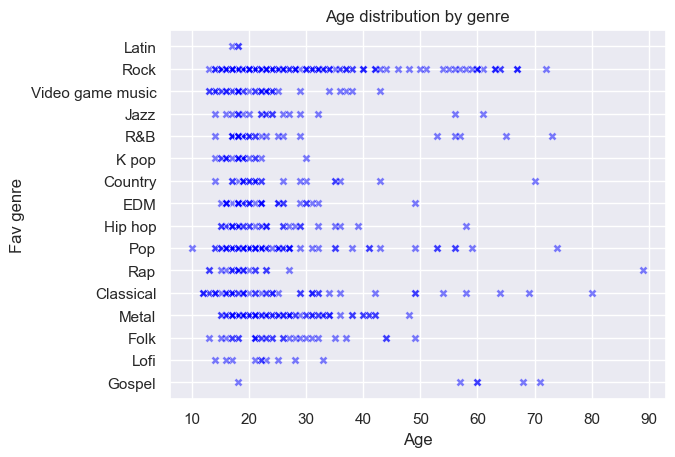

In [253]:
sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "Blue")
plt.title('Age distribution by genre');

# Rock has the most diverse range of ages. Classical and Pop listeners also have a wider range of ages compared 
# to other genres. Some music genres, such as K pop and Lofi appear to attract a more specific and younger age group.

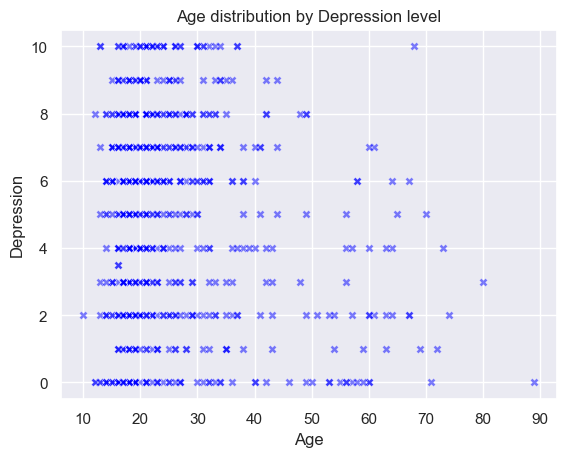

In [254]:
sns.scatterplot(data=df, y="Depression", x="Age", alpha = 0.5, marker = "X", color = "Blue")
plt.title('Age distribution by Depression level');

In [262]:
cleaned = df.dropna(subset=['Age', 'Anxiety'])

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

Age, Anxiety = cleaned.Age, cleaned.Anxiety
Cov(Age, OCD)



-4.447559813040863

In [263]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

Corr(Age, Anxiety)

-0.1766620165968846

In [264]:
np.corrcoef(Age, Anxiety)

array([[ 1.        , -0.17666202],
       [-0.17666202,  1.        ]])

In [265]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

SpearmanCorr(Age, Anxiety)

-0.0694192637435047

In [269]:
class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat
    
data = grown_age.Anxiety.values, rglr_age.Anxiety.values
ht = PregLengthTest(data)
p_value = ht.PValue()
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())

p-value = 0.0
actual = nan
ts max = nan


#### For this project, conduct a regression analysis on either one dependent and one explanatory variable

In [270]:
import statsmodels.formula.api as smf

formula = 'Anxiety ~ Age'
model = smf.ols(formula, data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Anxiety   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     20.73
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           6.24e-06
Time:                        01:42:06   Log-Likelihood:                -1709.2
No. Observations:                 704   AIC:                             3422.
Df Residuals:                     702   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8176      0.239     28.473      0.000       6.347       7.288
Age           -0.0392      0.009     -4.553      0.000      -0.056      -0.022
==============================================================================
Omnibus:                       55.858   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.662
Skew:                          -0.397   Prob(JB):                     4.90e-08
Kurtosis:                       2.281   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
formula = 'Age ~ Insomnia + Anxiety'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.62
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           1.08e-05
Time:                        01:44:39   Log-Likelihood:                -2738.1
No. Observations:                 704   AIC:                             5482.
Df Residuals:                     701   BIC:                             5496.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.9243      1.072     26.982      0.000      26.820      31.029
Insomnia       0.2395      0.152      1.574      0.116      -0.059       0.538
Anxiety       -0.8132      0.169     -4.821      0.000      -1.144      -0.482
==============================================================================
Omnibus:                      292.658   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.320
Skew:                           2.011   Prob(JB):                    1.25e-226
Kurtosis:                       7.393   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

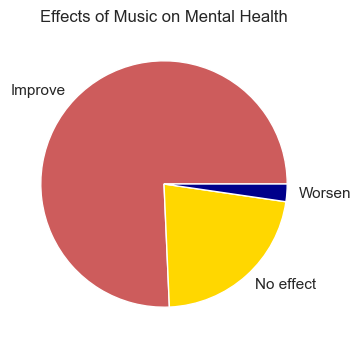

In [301]:
# Effects of Music on Mental health, pie diagram

plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');


Text(0, 0.5, '')

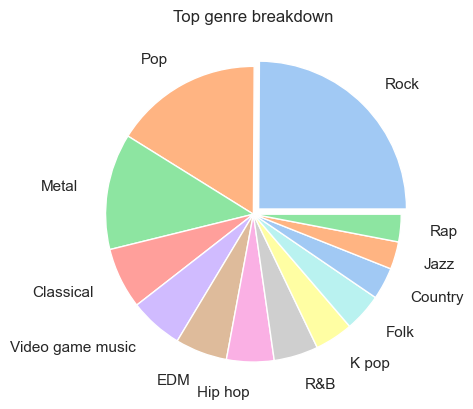

In [302]:
# Most popular genre of music as per the survey data

genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

# Rock is the most popular followed by pop and Metal.

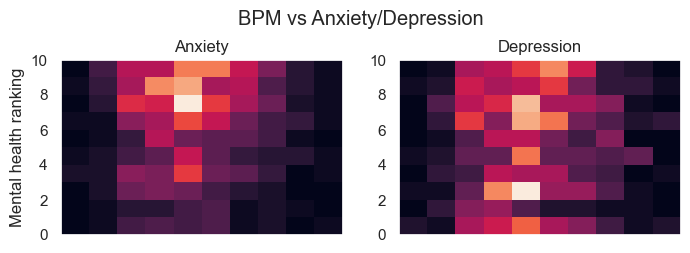

In [309]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Anxiety/Depression")

y = df["Anxiety"]
y2 = df["Depression"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);



In [310]:
df['MH Score'] = df['Anxiety'] + df['Depression'] 
print(df.nsmallest(50, ['MH Score'])['BPM'].mean())
print(df.nlargest(50, ['MH Score'])['BPM'].mean())

# There is no clear correlation between BPM and Anxiety/Depression.

117.7
126.16


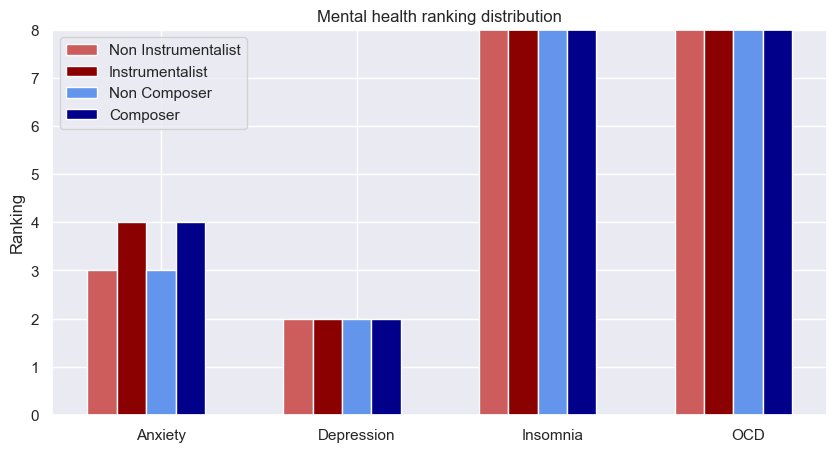

In [322]:
# MH ranking distrubution based on Instrumentalist, nonInstrumentalist, composer and noncomposer

df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
b3 = ax.bar(x, df[(df.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, df[(df.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

# Instrumentalists and composers have slightly higher MH rankings. However, OCD
# rankings are low regardless of musical background.

Text(0.5, 1.0, 'Streaming services by Age')

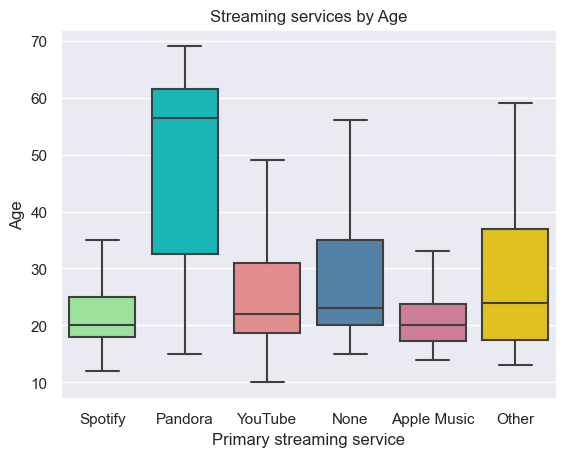

In [324]:
# Streaming service by age plotting

import seaborn as sns

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

#pandora is the most widely used between 33-62 years of age, younger people are mostly inclined towards Apple music and Spotify.

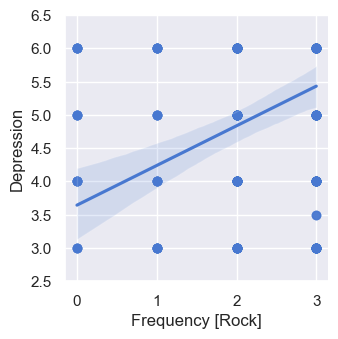

In [316]:
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = df, height=3.5)
fig.set(ylim=(2.5, 6.5))